In [ ]:
%reload_ext autoreload
%autoreload 2
import sys

sys.path.append('B://workspace/tensorflow')

from src.analysis.training import collect_logs, plot_overview

ImportError: cannot import name 'plot_single_curve' from 'src.analysis.training' (B:\/workspace/tensorflow\src\analysis\training.py)

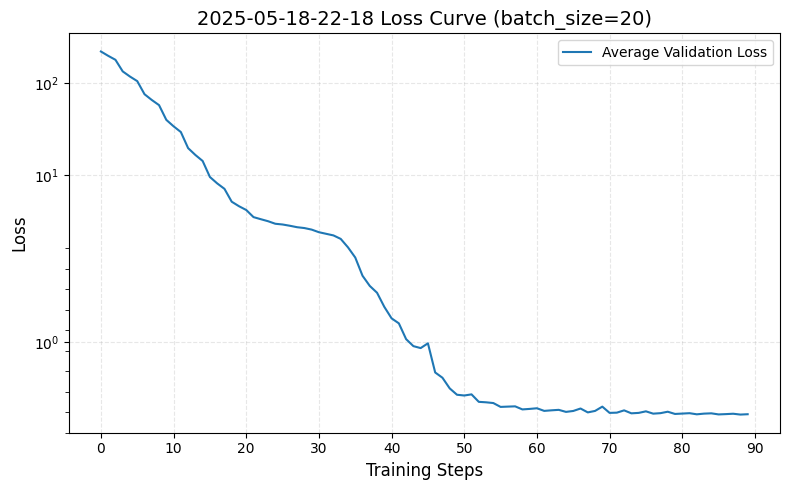

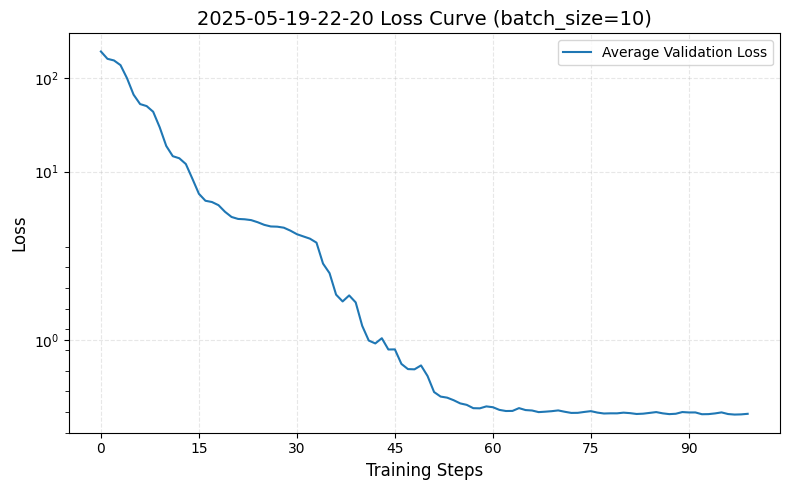

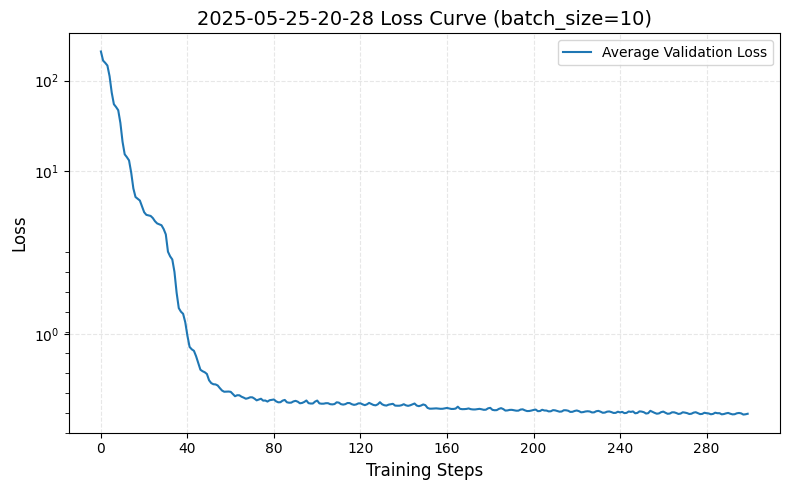

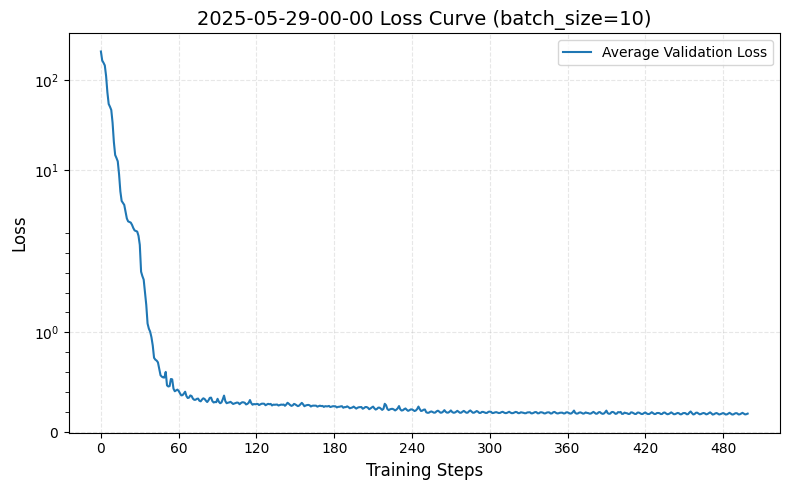

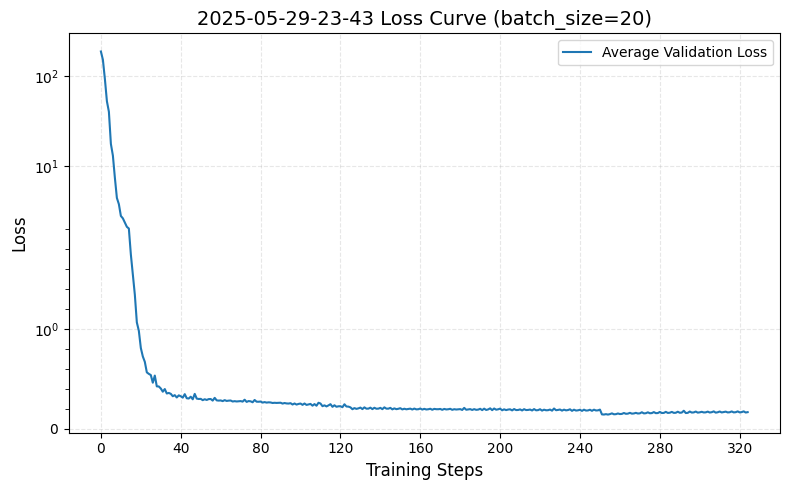

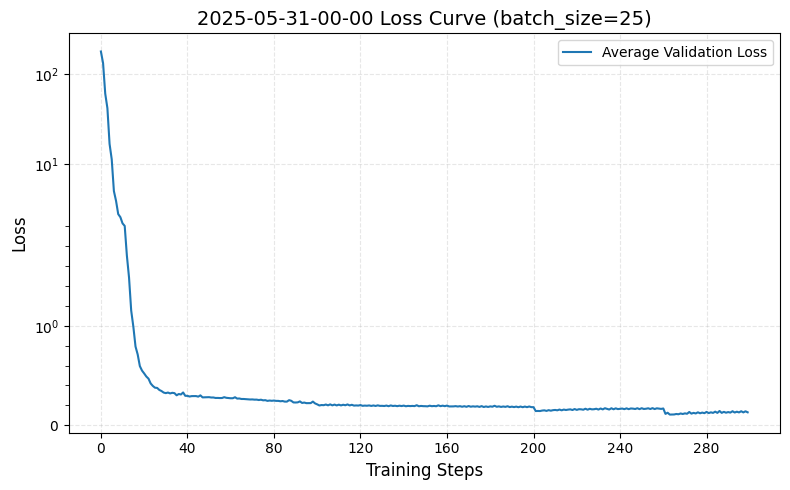

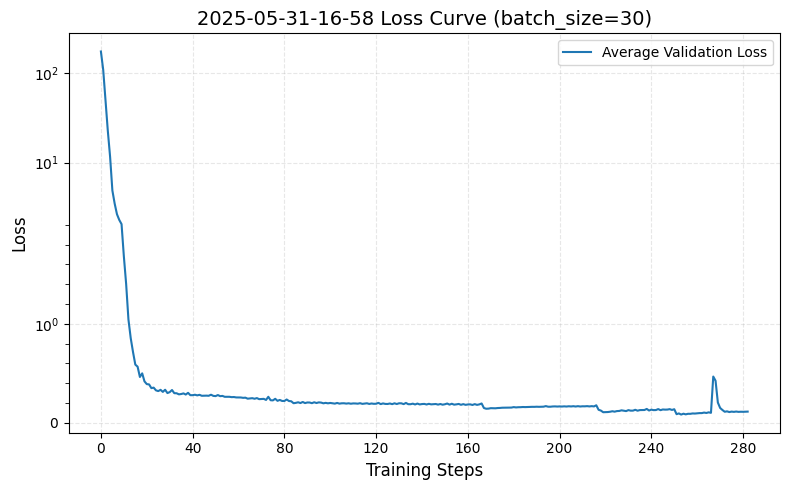

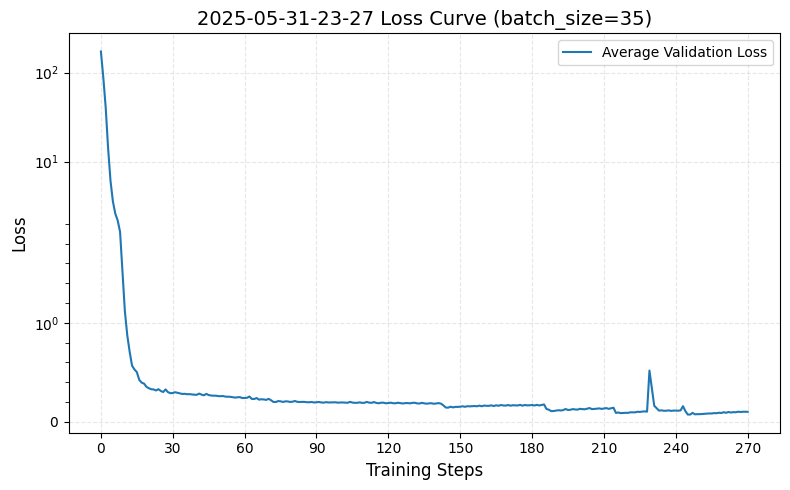

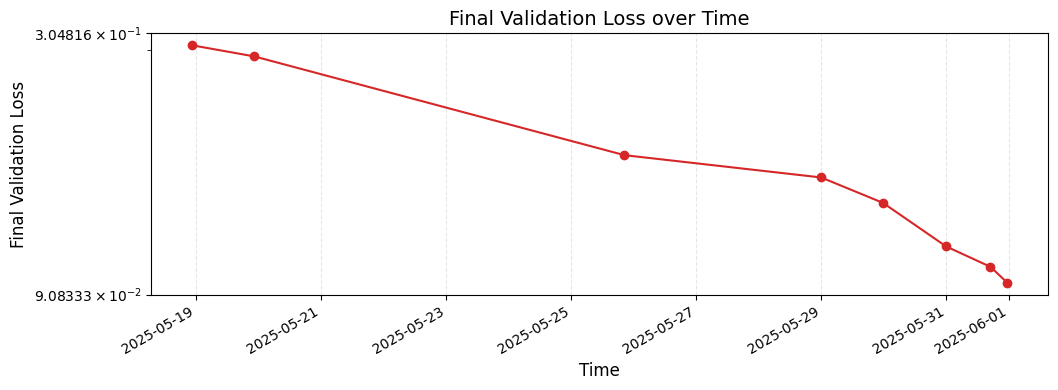

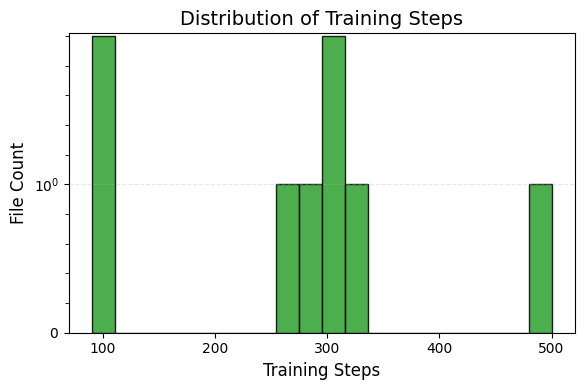

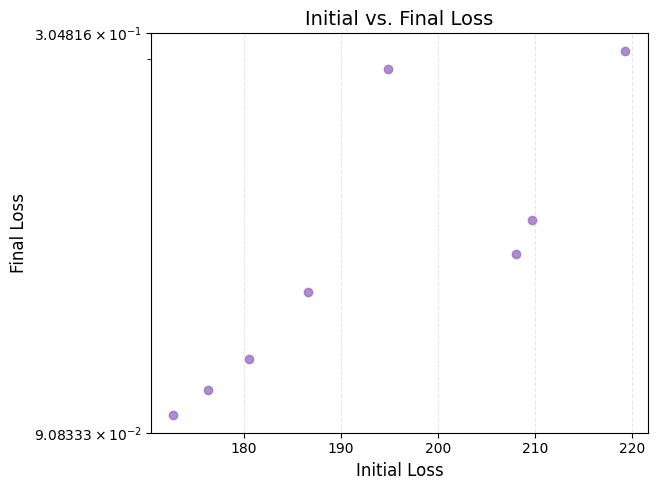

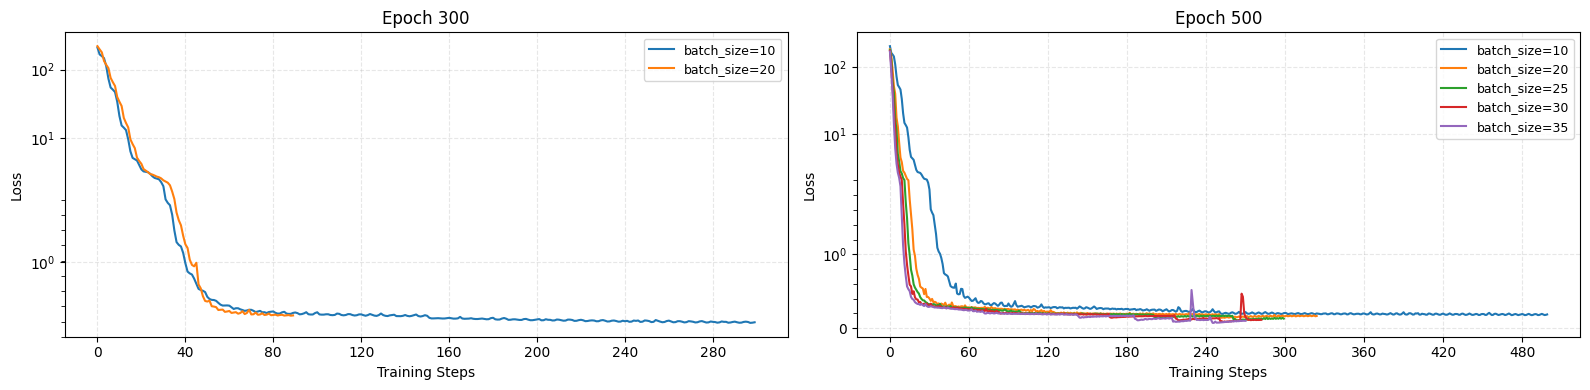

In [ ]:
# 训练输出目录
OUTPUT_DIR = 'B://workspace/tensorflow/train_output/Transformer 训练器'
# 日志中缺失时使用的默认 batch_size
DEFAULT_BATCH_SIZE = 20

df = collect_logs(OUTPUT_DIR)

# 绘制整体统计图
plot_overview(df)


In [ ]:
import numpy as np

from src.analysis.season import SeasonalityAnalysis
from src.dataset.ERA5 import ERA5SSTMonthlyDataset

dataset = ERA5SSTMonthlyDataset(
    width=1,
    offset=0,
    lon=np.array([100, 180]),  # 太平洋区域
    lat=np.array([-30, 30])    # 热带区域
)

# 创建分析器
analyzer = SeasonalityAnalysis(dataset)

# 进行季节性检验
results = analyzer.test_seasonality()

print("\n季节性分析结果:")
print(f"主导周期: {results['dominant_period']:.2f} 个月")
print(f"季节性强度: {results['seasonal_strength']:.2%}")
print(f"ANOVA F统计量: {results['anova_f']:.2f}")
print(f"ANOVA p值: {results['anova_p']:.2e}")

# 绘制季节性图表
fig = analyzer.plot_seasonal_patterns()